# Exercícios para entregar

1. Faça um relatório com o número de ordens fechadas por cada vendedor e o valor total vendido por cada um. Ordene pelo nome dos vendedores.
1. Qual a fração do valor vendido por cada cada vendedor em relação ao valor total das vendas?

# 1

    --Ordenado pelo Last_name
    SELECT 
    orders.employee_id, 
        COUNT(DISTINCT order_details.order_id) AS total_vendas,
        ROUND(SUM(order_details.unit_price*order_details.quantity*(1-order_details.discount))) AS Valor_vendido_total,
        employees.last_name,
        employees.first_name
    FROM 
        orders
    RIGHT JOIN 
        order_details ON orders.order_id = order_details.order_id
    RIGHT JOIN 
        employees ON orders.employee_id = employees.employee_id
    GROUP BY 
        employees.last_name, orders.employee_id, employees.first_name
    ORDER BY 
        employees.last_name;

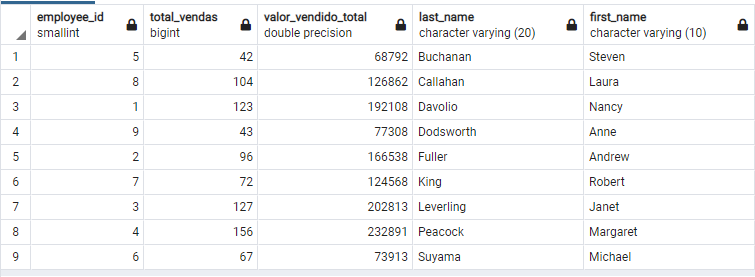

# 2

    ----SUBQUERRY----
    SELECT 
        ROUND(SUM(order_details.unit_price*order_details.quantity*(1-order_details.discount)))
    FROM
        order_details

    -- 2 --- Ordenada por last name --------------
    SELECT 
    orders.employee_id, 
        COUNT(DISTINCT order_details.order_id) AS total_vendas,
        ROUND(SUM(order_details.unit_price*order_details.quantity*(1-order_details.discount))::numeric,2) 
            AS Valor_vendido_total,
        ROUND((SUM(order_details.unit_price*order_details.quantity*(1-order_details.discount))
               /(SELECT SUM(order_details.unit_price*order_details.quantity*(1-order_details.discount))
                    FROM order_details))::numeric,2) 
                        AS percentual,
        employees.last_name,
        employees.first_name
    FROM 
        orders
    RIGHT JOIN 
        order_details ON orders.order_id = order_details.order_id
    RIGHT JOIN 
        employees ON orders.employee_id = employees.employee_id
    GROUP BY 
        employees.last_name, orders.employee_id, employees.first_name
    ORDER BY 
        employees.last_name;

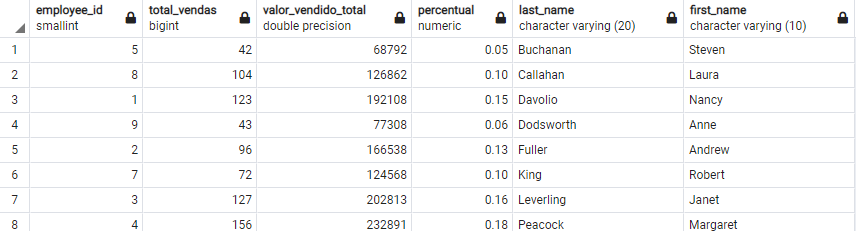